In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib nbagg

In [2]:
lam = 0.62
c_p = 4200
r = 0.1
T_env = 23
P = 400
m = 1
N = 100
h = 0 # 10 # ????
h_water = 1500

V = 1e-3 * m

eta = c_p * m * (62-23) / P / 522

A_c = np.pi * r ** 2
h_c = V / N / A_c
A_m = h_c * 2 * r * np.pi

In [3]:
m_x = m / N
Q_env = T_env * (c_p * m_x)
alpha = -h * A_m * c_p * m_x
beta = lam / (h_c ** 2 * c_p * m_x)
alpha2 = alpha - h * A_c * c_p * m_x

In [4]:
rho = m / V
m_x = m / N
alpha = -h * A_m / (c_p * m_x)
beta = lam / (rho * c_p * h_c ** 2) + h_water * A_c / (c_p * m_x)
alpha2 = alpha - h * A_c / (c_p * m_x)

In [5]:
h_water * A_c / (c_p * m_x), lam / (rho * c_p * h_c ** 2)

(1.121997376282069, 1.4569416020655717)

In [6]:
a = lam / (rho * c_p)
a

1.4761904761904763e-07

In [7]:
beta

2.5789389783476406

In [8]:
A = np.diag([alpha - 2 * beta] * N)

In [9]:
A[range(1, N), range(0, N-1)] = beta
A[range(0, N-1), range(1, N)] = beta

In [10]:
A[0, 0] = alpha2 - beta
A[-1, -1] = alpha2 - beta

In [11]:
B = np.zeros((N, 2))
B[0, 0] = P * eta / (c_p * m_x)

In [12]:
B[:, 1] = -alpha
B[0, 1] = -alpha2
B[-1, 1] = -alpha2

In [13]:
#u = np.array([[1, Q_env]]).transpose()
#u = np.array([[0, Q_env]]).transpose()
u = np.array([[0, T_env]]).transpose()

In [14]:
#initial_state = np.array([[Q_env] * N]).transpose()
initial_state = np.array([[T_env] * N]).transpose()

In [15]:
state = np.float64(initial_state)

In [16]:
#np.dot(A, state) + np.dot(B, u)

In [17]:
#u = np.array([[1, Q_env]]).transpose()
u = np.array([[1, T_env]]).transpose()

In [18]:
dt = 0.01
T = 522

In [19]:
num_steps = int(T / dt)
evolution = np.zeros((num_steps * 2, len(state)))

In [20]:
for t in tqdm_notebook(range(int(T / dt))):
    d_state = (np.dot(A, state) + np.dot(B, u)) * dt
    state += d_state
    evolution[t, :] = state.transpose()

In [21]:
#u = np.array([[0, Q_env]]).transpose()
u = np.array([[0, T_env]]).transpose()

In [22]:
for t in tqdm_notebook(range(int(T / dt))):
    d_state = (np.dot(A, state) + np.dot(B, u)) * dt
    state += d_state
    evolution[num_steps + t, :] = state.transpose()

In [23]:
evolution[int(522 / dt), N // 2], max(evolution[:, N // 2])

(49.526818804275351, 61.748565661716263)

<IPython.core.display.Javascript object>


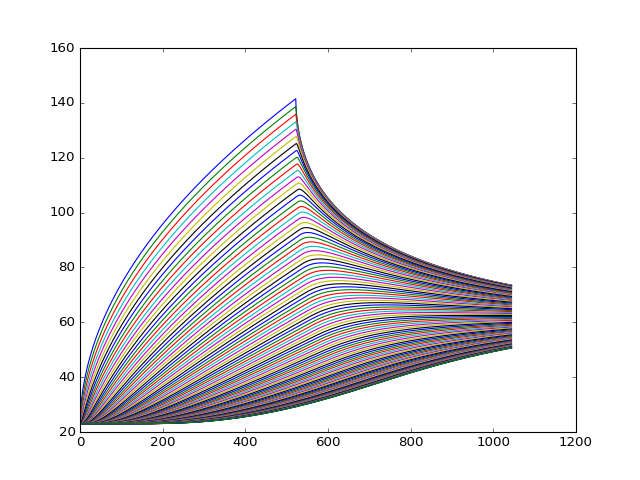

In [27]:
plt.figure()
#plt.plot(evolution[:, ::] / (c_p * m_x))
plt.plot(np.arange(len(evolution)) * dt, evolution[:, ::])

In [25]:
evolution[:10, 0]

array([ 23.07471264,  23.14749849,  23.21845693,  23.28768093,
        23.35525753,  23.42126822,  23.48578941,  23.54889271,
        23.61064534,  23.67111037])